In [1]:
# Import necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pandas_profiling 
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
import math

In [2]:
dataset = pd.read_csv('conviva_sampledata.csv')

In [3]:
dataset2=pd.read_csv('without_genre.csv')

In [4]:
pd.set_option('display.max_columns', 24)

In [5]:
dataset.head()

,Unnamed: 0,viewerid,asset,deviceos,country,state,city,asn,isp,starttime,startuptime,playingtime,bufferingtime,interrupts,averagebitrate,startuperror,ipaddress,cdn,sessiontag_c3_player_name,sessiontag_c3_client_brand,sessiontag_connectiontype,sessiontag_c3_client_hwtype,sessiontag_accesstype,churn
0,0,0171fdb9-d8db-4e00-a9d8-c1619811ac66,[0-0-27132] Kedarnath,Android,india,madhya pradesh,bhopal,24560,"ASN: AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.,...",1559557555,5794,241545,7894,5,0,0,122.168.85.95,AKAMAI,Z5+FireTV+Jwplayer,Xiaomi,Data,TV,Premium,1
1,1,0171fdb9-d8db-4e00-a9d8-c1619811ac66,[0-0-35166] Simmba,Android,india,madhya pradesh,bhopal,24560,"ASN: AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.,...",1559557880,3804,495148,8820,3,0,0,122.168.85.95,AMAZON,Z5+FireTV+Jwplayer,Xiaomi,Data,TV,Premium,1
2,2,0171fdb9-d8db-4e00-a9d8-c1619811ac66,[0-0-35021] Nirahua Hindustani 3,Android,india,madhya pradesh,indore,24560,"ASN: AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.,...",1559448731,15589,667004,0,0,0,0,122.170.203.36,AKAMAI,Z5+FireTV+Jwplayer,Xiaomi,Data,TV,Premium,1
3,3,02d7f343-f75d-4f10-a5c4-7f21ed6ff341,[0-1-215897] Skyfire - Episode 8 - The Monster,Android,india,uttar pradesh,ghaziabad,134375,ASN: FWSPL-AS-AP Fusionnet Web Services Privat...,1561486982,9716,28207,2055,1,0,0,103.219.230.183,AKAMAI,Z5+Android+Player_3.4.3,Oppo,WiFi,Mobile+Phone,Premium,1
4,4,02d7f343-f75d-4f10-a5c4-7f21ed6ff341,[0-0-6956] Great Grand Masti,Android,india,uttar pradesh,ghaziabad,134375,ASN: FWSPL-AS-AP Fusionnet Web Services Privat...,1561834149,4567,3509116,13811,2,0,0,103.219.229.92,AKAMAI,Z5+Android+Player_3.4.3,Oppo,WiFi,Mobile+Phone,Premium,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   Unnamed: 0                   1048575 non-null  int64 
 1   viewerid                     1048575 non-null  object
 2   asset                        1047283 non-null  object
 3   deviceos                     1048563 non-null  object
 4   country                      1048575 non-null  object
 5   state                        1048575 non-null  object
 6   city                         1048575 non-null  object
 7   asn                          1048575 non-null  int64 
 8   isp                          1048575 non-null  object
 9   starttime                    1048575 non-null  int64 
 10  startuptime                  1048575 non-null  int64 
 11  playingtime                  1048575 non-null  int64 
 12  bufferingtime                1048575 non-null  int64 
 1

In [7]:
dataset.isnull().sum()

Unnamed: 0                         0
viewerid                           0
asset                           1292
deviceos                          12
country                            0
state                              0
city                               0
asn                                0
isp                                0
starttime                          0
startuptime                        0
playingtime                        0
bufferingtime                      0
interrupts                         0
averagebitrate                     0
startuperror                       0
ipaddress                          0
cdn                                0
sessiontag_c3_player_name          0
sessiontag_c3_client_brand     15922
sessiontag_connectiontype        202
sessiontag_c3_client_hwtype     2015
sessiontag_accesstype              0
churn                              0
dtype: int64

In [8]:
dataset.nunique()

Unnamed: 0                     1048575
viewerid                        100532
asset                            52309
deviceos                            19
country                              1
state                               36
city                               778
asn                                857
isp                                715
starttime                       804383
startuptime                      27916
playingtime                     458527
bufferingtime                   107723
interrupts                         497
averagebitrate                   19737
startuperror                         2
ipaddress                       402014
cdn                                  6
sessiontag_c3_player_name           26
sessiontag_c3_client_brand         164
sessiontag_connectiontype            3
sessiontag_c3_client_hwtype          9
sessiontag_accesstype                1
churn                                2
dtype: int64

In [9]:
dataset.dropna(axis=0, how='any', inplace=True)

In [10]:
dataset.isnull().sum()

Unnamed: 0                     0
viewerid                       0
asset                          0
deviceos                       0
country                        0
state                          0
city                           0
asn                            0
isp                            0
starttime                      0
startuptime                    0
playingtime                    0
bufferingtime                  0
interrupts                     0
averagebitrate                 0
startuperror                   0
ipaddress                      0
cdn                            0
sessiontag_c3_player_name      0
sessiontag_c3_client_brand     0
sessiontag_connectiontype      0
sessiontag_c3_client_hwtype    0
sessiontag_accesstype          0
churn                          0
dtype: int64

In [11]:
dataset.drop(['Unnamed: 0'], axis=1, inplace = True)

In [12]:
# 1)How many users watched kaafir? (5 points)
filt = dataset.loc[:,'asset'].str.contains('Kaafir')
new_dataset = dataset.loc[filt].reset_index()

In [13]:
new_dataset.drop(['index'], axis=1, inplace = True)

In [14]:
new_dataset.head()

,viewerid,asset,deviceos,country,state,city,asn,isp,starttime,startuptime,playingtime,bufferingtime,interrupts,averagebitrate,startuperror,ipaddress,cdn,sessiontag_c3_player_name,sessiontag_c3_client_brand,sessiontag_connectiontype,sessiontag_c3_client_hwtype,sessiontag_accesstype,churn
0,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-226371] Kaafir - Episode 4 - Judgement Day,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560623844,2254,1144925,22126,2,0,0,117.97.225.63,AMAZON,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1
1,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-226388] Kaafir - Episode 6 - Where Do We ...,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560632478,1585,569371,332,1,0,0,117.97.225.63,AKAMAI,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1
2,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-226358] Kaafir - Episode 1 - The First Me...,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560625393,-1,0,0,0,0,0,117.97.225.63,TATA,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1
3,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-226371] Kaafir - Episode 4 - Judgement Day,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560623844,2254,1036035,1259,1,0,0,117.97.225.63,AMAZON,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1
4,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-226358] Kaafir - Episode 1 - The First Me...,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560632470,1703,6422,0,0,0,0,117.97.225.63,AKAMAI,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1


In [15]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   viewerid                     52560 non-null  object
 1   asset                        52560 non-null  object
 2   deviceos                     52560 non-null  object
 3   country                      52560 non-null  object
 4   state                        52560 non-null  object
 5   city                         52560 non-null  object
 6   asn                          52560 non-null  int64 
 7   isp                          52560 non-null  object
 8   starttime                    52560 non-null  int64 
 9   startuptime                  52560 non-null  int64 
 10  playingtime                  52560 non-null  int64 
 11  bufferingtime                52560 non-null  int64 
 12  interrupts                   52560 non-null  int64 
 13  averagebitrate               52

In [16]:
dataset2.head()

,Unnamed: 0,Id_tv,DateCreated,Index,Duration,seasonid,episode_id,DateModified,DatePublished,PublicationState,title_episodetable,Subtype,show_id_episodetable,title,AudioLanguages,show_id_showtable,title_showtable,OriginalExternalId,SubtitleLanguages,subtype_tvshow,Rating,businessType
0,0,1985f0aa-05dd-463b-a22d-2062906ea170,26-02-2019 10:23:11 +00:00,499,305.0,0-2-Joyee1,0-1-180298,26-02-2019 10:24:34 +00:00,26-02-2019 10:27:22 +00:00,3,"Joyee - (Bangla) - February 25, 2019 - Webisod...",webisode,0-6-669,Joyee,bn,0-6-669,Joyee,669,NaN,tvshow,4.0,advertisement_downloadable
1,1,72d9860f-165c-49e8-a11c-22ac57b2da16,21-02-2019 10:00:59 +00:00,592,1260.0,0-2-SapneSuhaneLadakpanK1,0-1-178964,21-02-2019 10:16:55 +00:00,21-02-2019 10:27:02 +00:00,3,Episode 592,episode,0-6-139,Sapne Suhane Ladakpan Ke,hi,0-6-139,Sapne Suhane Ladakpan Ke,139,NaN,tvshow,4.0,advertisement_downloadable
2,2,5adaa642-8c7c-4391-afa5-53949c43a829,13-07-2018 12:56:21 +00:00,1626,1327.0,0-2-ToAganaTulasiMu1,0-1-toaganatulasimu-toaganatulasimuseaso-episo...,13-07-2018 15:09:50 +00:00,13-07-2018 15:09:30 +00:00,3,"To Agana Tulasi Mu - Episode 1626 - July 13, 2...",episode,0-6-652,To Aganara Tulasi Mun,or,0-6-652,To Aganara Tulasi Mun,652,NaN,tvshow,4.0,advertisement_downloadable
3,3,81126e99-3658-4636-a241-b052f8388d7f,07-11-2017 17:09:39 +00:00,117,1500.0,0-2-RadhaHeeBawaree1,0-1-104079,22-01-2018 12:33:56 +00:00,02-07-2018 11:18:24 +00:00,3,Radha Hee Bawaree - Episode 117 - Full Episode,episode,0-6-410,Radha Hee Bawaree,mr,0-6-410,Radha Hee Bawaree,410,NaN,tvshow,NaN,advertisement
4,4,82d17e69-c79b-49df-9f90-b696c053e056,11-10-2017 23:18:57 +00:00,39,1260.0,0-2-RudraKeRakshak1,0-1-84313,22-01-2018 12:06:55 +00:00,13-02-2018 14:38:13 +00:00,3,"Rudra Ke Rakshak - Episode 39 - May 31, 2017 -...",episode,0-6-329,Rudra Ke Rakshak,hi,0-6-329,Rudra Ke Rakshak,329,NaN,tvshow,4.0,advertisement_downloadable


In [17]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236258 entries, 0 to 236257
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            236258 non-null  int64  
 1   Id_tv                 236258 non-null  object 
 2   DateCreated           236258 non-null  object 
 3   Index                 236258 non-null  int64  
 4   Duration              232694 non-null  float64
 5   seasonid              236258 non-null  object 
 6   episode_id            236258 non-null  object 
 7   DateModified          233904 non-null  object 
 8   DatePublished         226324 non-null  object 
 9   PublicationState      236258 non-null  int64  
 10  title_episodetable    236257 non-null  object 
 11  Subtype               233608 non-null  object 
 12  show_id_episodetable  236258 non-null  object 
 13  title                 236258 non-null  object 
 14  AudioLanguages        236258 non-null  object 
 15  

In [18]:
dataset2.isnull().sum()

Unnamed: 0                   0
Id_tv                        0
DateCreated                  0
Index                        0
Duration                  3564
seasonid                     0
episode_id                   0
DateModified              2354
DatePublished             9934
PublicationState             0
title_episodetable           1
Subtype                   2650
show_id_episodetable         0
title                        0
AudioLanguages               0
show_id_showtable            0
title_showtable              0
OriginalExternalId       74707
SubtitleLanguages       209407
subtype_tvshow               0
Rating                    3256
businessType                 0
dtype: int64

In [19]:
dataset2.drop(['Unnamed: 0'], axis=1, inplace = True)

In [20]:
filt2 = dataset2['title'].str.contains('Kaafir')
new_dataset2 = dataset2.loc[filt2].reset_index()

In [21]:
new_dataset2.head(30)

,index,Id_tv,DateCreated,Index,Duration,seasonid,episode_id,DateModified,DatePublished,PublicationState,title_episodetable,Subtype,show_id_episodetable,title,AudioLanguages,show_id_showtable,title_showtable,OriginalExternalId,SubtitleLanguages,subtype_tvshow,Rating,businessType
0,168,77cac239-0b45-4a7a-ae7e-88ea0e5ebef8,05-06-2019 13:15:23 +00:00,3,57.0,0-2-1573,0-1-222735,24-06-2019 06:19:09 +00:00,05-08-2019 09:41:18 +00:00,3,Kaafir - Dia And Seher Character Promo,promo,0-6-1741,Kaafir,hi,0-6-1741,Kaafir,1741,NaN,original,5.0,premium_downloadable
1,1217,4a92c371-5ec6-4b96-bfef-65f1b874efa3,08-08-2019 07:40:20 +00:00,4,2848.0,0-2-1791,0-1-252423,30-08-2019 12:43:43 +00:00,30-08-2019 13:02:57 +00:00,2,Episode 4 - Judgement Day,episode,0-6-1985,Kaafir,kn,0-6-1985,Kaafir,NaN,en,original,5.0,premium_downloadable
2,3781,d49ab073-05dd-4cc3-98c3-d3144eccf146,08-08-2019 07:58:13 +00:00,5,2749.0,0-2-1791,0-1-252439,30-08-2019 12:46:40 +00:00,30-08-2019 13:03:00 +00:00,2,Episode 5 - Redemption & Retribution,episode,0-6-1985,Kaafir,kn,0-6-1985,Kaafir,NaN,en,original,5.0,premium_downloadable
3,4119,342aabf1-7ffc-48ae-a5eb-02813df92398,15-05-2019 12:10:27 +00:00,4,23.0,0-2-1573,0-1-213704,10-07-2019 12:31:49 +00:00,05-08-2019 09:41:14 +00:00,3,Kaafir - Motion Poster,trailer,0-6-1741,Kaafir,hi,0-6-1741,Kaafir,1741,NaN,original,5.0,premium_downloadable
4,8344,4af3947f-1324-4b6f-bf18-d0877ce5a13d,01-08-2019 13:33:02 +00:00,1,1189.0,0-2-1573,0-1-249256,05-08-2019 09:39:37 +00:00,05-08-2019 09:41:03 +00:00,3,Kaafir Conversations - Part 1,clip,0-6-1741,Kaafir,hi,0-6-1741,Kaafir,1741,NaN,original,5.0,premium_downloadable
5,23828,fd69357c-0c43-4d2d-bca7-39c26b7f0faa,12-06-2019 10:44:44 +00:00,2,2370.0,0-2-1573,0-1-226365,28-08-2019 08:48:25 +00:00,28-08-2019 08:48:48 +00:00,3,Episode 2 - A Tale of Retrospection,episode,0-6-1741,Kaafir,hi,0-6-1741,Kaafir,1741,NaN,original,5.0,premium_downloadable
6,25434,4b9f13b4-d127-4bbf-90a7-5f5ba4b54d63,08-08-2019 07:01:31 +00:00,2,2370.0,0-2-1792,0-1-252374,30-08-2019 12:14:44 +00:00,30-08-2019 12:34:25 +00:00,2,Episode 2 - A Tale of Retrospection,episode,0-6-1986,Kaafir,ml,0-6-1986,Kaafir,NaN,en,original,5.0,premium_downloadable
7,27844,38520534-ca5a-4556-ba95-7603cf5e70eb,08-08-2019 09:12:37 +00:00,6,2804.0,0-2-1790,0-1-252470,30-08-2019 11:57:41 +00:00,30-08-2019 12:05:48 +00:00,2,Episode 6 - Where Do We Belong?,episode,0-6-1984,Kaafir,te,0-6-1984,Kaafir,NaN,en,original,5.0,premium_downloadable
8,28474,b8e53506-c4c9-4e30-891b-50909aa41bbe,24-06-2019 05:22:22 +00:00,1,216.0,0-2-1573,0-1-231597,13-08-2019 14:25:37 +00:00,13-08-2019 14:25:49 +00:00,3,Kaafir - Title Track - Dil Kaafir,promo,0-6-1741,Kaafir,hi,0-6-1741,Kaafir,1741,NaN,original,5.0,premium_downloadable
9,35271,248c5746-652c-4ec5-b2a6-c28460e670d2,12-06-2019 10:58:39 +00:00,6,2804.0,0-2-1573,0-1-226388,28-08-2019 10:04:24 +00:00,28-08-2019 10:05:48 +00:00,3,Episode 6 - Where Do We Belong?,episode,0-6-1741,Kaafir,hi,0-6-1741,Kaafir,1741,NaN,original,5.0,premium_downloadable


In [22]:
new_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 56 non-null     int64  
 1   Id_tv                 56 non-null     object 
 2   DateCreated           56 non-null     object 
 3   Index                 56 non-null     int64  
 4   Duration              56 non-null     float64
 5   seasonid              56 non-null     object 
 6   episode_id            56 non-null     object 
 7   DateModified          56 non-null     object 
 8   DatePublished         56 non-null     object 
 9   PublicationState      56 non-null     int64  
 10  title_episodetable    56 non-null     object 
 11  Subtype               56 non-null     object 
 12  show_id_episodetable  56 non-null     object 
 13  title                 56 non-null     object 
 14  AudioLanguages        56 non-null     object 
 15  show_id_showtable     56 

In [23]:
d= new_dataset2['title_episodetable'].str.contains('Episode')

In [24]:
d2 = new_dataset2.loc[d].reset_index()

In [25]:
duration = d2.drop_duplicates(subset=['Duration'], keep='first')

In [26]:
a = duration[['title_episodetable','Duration']].sort_values(by=['title_episodetable']).reset_index()

In [27]:
Duration = a.drop('index', axis=1)

In [28]:
Duration

,title_episodetable,Duration
0,Episode 1 - The First Meeting,1974.0
1,Episode 2 - A Tale of Retrospection,2370.0
2,Episode 3 - Truth & Lies,1963.0
3,Episode 4 - Judgement Day,2848.0
4,Episode 5 - Redemption & Retribution,2749.0
5,Episode 6 - Where Do We Belong?,2804.0
6,Episode 7 - A Final Try,2459.0
7,Episode 8 - The Last Goodbye,3273.0


In [29]:
#2)Those who have watched Kaafir, what’s per viewer average time spent on it? (10 points)
mean_time_per_viewr = pd.DataFrame(new_dataset.groupby('viewerid').playingtime.sum())

In [30]:
(mean_time_per_viewr['playingtime'].sum()/len(mean_time_per_viewr))/60000

39.2826959912822

In [31]:
mean_time_indv_viewr = pd.DataFrame(new_dataset.groupby('viewerid').playingtime.mean())

In [32]:
# Mean time of viewer in Hours
pd.DataFrame(mean_time_indv_viewr.playingtime/60000)

,playingtime
viewerid,
0005ebdc-f74b-4750-bf09-14b038b519e8,3.397656
00084ff7-d0f8-40dd-8221-9a10865408c7,12.615356
0008badf-5d15-4106-982c-1e068b47f48a,0.090942
000f686c-b5f5-45dd-9fa5-02eb8a24c30c,10.567660
00228901-fc03-43ea-aac6-59db63c55bd2,0.863454
...,...
ffe8cf49-a0f0-4c21-9b3f-a9e3add69f20,2.330808
ffe9f7a1-d872-41cd-b337-c26a6f0904e4,1.047833
fffbe4f0-9ace-4323-afae-3abc9b224a3d,4.152020


In [33]:
#m = new_dataset[['viewerid','starttime']] 

In [34]:
#m['j'] = m['starttime'].dt.date

# # 3)How many users spent more than 2 Hrs watching kaafir on any day? (10 points)

In [35]:
data_for_2H = new_dataset[['viewerid','starttime','playingtime']]

In [36]:
#new_dataset['starttime'] = pd.to_datetime(new_dataset['starttime'],unit='s')
data_for_2H['starttime'] = pd.to_datetime(data_for_2H['starttime'],unit='s')

<ipython-input-36-aa338e650e96>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
#new_dataset['startdate'] = new_dataset['starttime'].dt.date
data_for_2H['startdate'] = data_for_2H['starttime'].dt.date

<ipython-input-37-18b5a909749f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#filt= new_dataset.groupby(['viewerid', 'startdate']).sum()
filt= data_for_2H.groupby(['viewerid', 'startdate']).sum()

In [39]:
filt['playingtime'] = filt['playingtime']/60000

In [40]:
time_spend_2H =filt[filt['playingtime']>120]

In [41]:
time_spend_2H.shape

(681, 1)

# 4)How many of users watched kaafir more than 50% of the duration? (15 points)


In [42]:
total_duration = Duration['Duration'].sum()

In [43]:
duratin_50per = total_duration/2 

In [44]:
watch_greater_than50per = pd.DataFrame(new_dataset.groupby('viewerid')['playingtime'].sum())

In [45]:
print(len(watch_greater_than50per[watch_greater_than50per['playingtime']>duratin_50per]),"users watched kaafir more than 50% of the duration.")

10663 users watched kaafir more than 50% of the duration.


# 5) How many watched All episodes of Kaafir (irrespective of how much)? (15 points)

In [46]:
total_watch = new_dataset[['viewerid', 'asset']]

In [47]:
filt = total_watch['asset'].str.contains('Episode')

In [48]:
#filt = dataset.loc[:,'asset'].str.contains('Kaafir')
episode_watch = total_watch.loc[filt]

In [49]:
episode_watch[['a','b','Show', 'Episode', 'Title']] = episode_watch['asset'].str.split('-', expand=True)

C:\Users\GAURAV\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
group_by_vid = episode_watch.groupby('viewerid')

In [51]:
tkaafir_episode_wathced = pd.DataFrame(group_by_vid['Episode'].nunique())

In [52]:
f = tkaafir_episode_wathced[tkaafir_episode_wathced['Episode']==8]

In [53]:
f.reset_index(inplace=True)

In [54]:
f

,viewerid,Episode
0,0191053f-9ca1-4a80-a74f-375ab9281816,8
1,02c291f3-bc86-4fbb-9efd-8e02b9ed0990,8
2,03e7920a-2714-462a-a26e-d2d418c1ee1b,8
3,0ec8aac9-3e0f-43e4-b604-4a8c4adfc3c4,8
4,110689db-9cad-4c54-aae2-e7ba0eac175f,8
...,...,...
101,e9d164de-20aa-4e05-acae-51c6903b8edf,8
102,edcda9e7-1675-44c3-a4f1-c567f3d89b39,8
103,eeb8215a-17ec-4055-9310-dbac1615cd78,8
104,faf047f0-0ca4-4852-acd2-dd0cf7350bfc,8


In [55]:
print(len(tkaafir_episode_wathced[tkaafir_episode_wathced['Episode']==8]), ' Viewer Watched all episode of kaafir')

106  Viewer Watched all episode of kaafir


# 6)How many watched All episodes of Kaafir (irrespective of how much) within 24 hours from when they started? (30 points

In [56]:
watch_within_24H = new_dataset[['viewerid','asset','starttime','startuptime','playingtime']]

In [57]:
#d['startuptime'] = pd.to_datetime(d['startuptime'],unit='s')
watch_within_24H['playingtime'] = watch_within_24H['playingtime']/1000

<ipython-input-57-db59b2ccd5d7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
watch_within_24H['stime'] = watch_within_24H['starttime'] + watch_within_24H['startuptime']

<ipython-input-58-ce1259378080>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
watch_within_24H['endtime'] = watch_within_24H['starttime'] + watch_within_24H['startuptime']+ watch_within_24H['playingtime']

<ipython-input-59-12afca0e8289>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
watch_within_24H['endtime'] = pd.to_datetime(watch_within_24H['endtime'],unit='s')

<ipython-input-60-d9b88be00f6e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
watch_within_24H['stime'] = pd.to_datetime(watch_within_24H['stime'],unit='s')

<ipython-input-61-29991a12571b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
kaafir_within_24hr = watch_within_24H.groupby(['viewerid']).agg({'stime':min,'endtime':max})

In [63]:
kaafir_within_24hr

,stime,endtime
viewerid,,
0005ebdc-f74b-4750-bf09-14b038b519e8,2019-06-23 08:46:40,2019-06-24 10:35:04.262000084
00084ff7-d0f8-40dd-8221-9a10865408c7,2019-06-20 18:41:45,2019-06-25 09:24:41.267999887
0008badf-5d15-4106-982c-1e068b47f48a,2019-06-29 18:09:02,2019-06-29 19:23:29.176000118
000f686c-b5f5-45dd-9fa5-02eb8a24c30c,2019-06-27 14:40:50,2019-06-27 17:01:22.773999929
00228901-fc03-43ea-aac6-59db63c55bd2,2019-06-19 09:50:01,2019-06-21 22:53:34.040999889
...,...,...
ffe8cf49-a0f0-4c21-9b3f-a9e3add69f20,2019-06-15 17:04:12,2019-06-23 18:22:15.792999983
ffe9f7a1-d872-41cd-b337-c26a6f0904e4,2019-06-07 13:48:28,2019-06-27 05:39:41.000000000
fffbe4f0-9ace-4323-afae-3abc9b224a3d,2019-06-18 16:26:34,2019-06-19 17:17:41.279999971


In [64]:
kaafir_within_24hr['timediff'] = kaafir_within_24hr['endtime'] - kaafir_within_24hr['stime']

In [65]:
#kaafir_within_24hr = kaafir_within_24hr[(kaafir_within_24hr['endtime'] - kaafir_within_24hr['stime']).astype('timedelta64[h]') <=24]

In [66]:
sep_by_datetime = pd.DataFrame(kaafir_within_24hr['timediff'].dt.components)

In [67]:
filt2 = sep_by_datetime[(sep_by_datetime['days']==0) & (sep_by_datetime['hours']<=24)]

In [68]:
filt2.reset_index(inplace=True)

In [69]:
filt2

,viewerid,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0008badf-5d15-4106-982c-1e068b47f48a,0,1,14,27,176,0,118
1,000f686c-b5f5-45dd-9fa5-02eb8a24c30c,0,2,20,32,773,999,929
2,0027df1c-7dcf-4e65-98b3-e45bb7877fa6,0,16,2,5,717,999,935
3,002aebad-2fd4-446c-824b-e525c4dcc013,0,18,21,27,115,0,10
4,003652ae-ff0a-4a0e-a57e-b4f76992777f,0,23,41,41,963,0,59
...,...,...,...,...,...,...,...,...
8864,ffcfcab4-44bf-44b1-b164-d940bdf1301c,0,0,0,6,661,0,13
8865,ffd94eae-c8c9-4c5b-93ce-471d681061bc,0,0,2,5,279,0,44
8866,ffe414b7-b203-4e85-9e83-2bcc40127997,0,0,0,2,200,0,48
8867,ffe454b6-66c5-4e14-adf9-524c94e3fd31,0,3,11,43,39,0,34


In [70]:
kaafir_allepisodes = list(set(filt2['viewerid']) & set(f['viewerid']))

In [71]:
total_ep = pd.DataFrame(kaafir_allepisodes)

In [72]:
print(len(total_ep),"Viwer watched all episode within 24 hours")

13 Viwer watched all episode within 24 hours


In [73]:
watch_within_24H['stime'] = pd.to_datetime(watch_within_24H['stime'],unit='s')

<ipython-input-73-29991a12571b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 7)	How many watched All Episodes of Kaafir and at least 5 minutes of each episodes? (30 points)

In [74]:
data_for_find_5min = new_dataset[['viewerid','asset','playingtime']]

In [75]:
filt3 = data_for_find_5min['asset'].str.contains('Episode')

In [76]:
episode_watch2 = data_for_find_5min.loc[filt3]

In [77]:
episode_watch2[['a','b','Show', 'Episode', 'Title']] = episode_watch2['asset'].str.split('-', expand=True)

C:\Users\GAURAV\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
group_by_vid2 = episode_watch2.groupby(['viewerid','Episode']).sum()

In [79]:
group_In_dtafreame = pd.DataFrame(group_by_vid2)

In [80]:
group_In_dtafreame.reset_index(inplace=True)

In [81]:
group_In_dtafreame['playingtime'] = group_In_dtafreame['playingtime']/60000

In [82]:
watch_atleast_5min = group_In_dtafreame[group_In_dtafreame['playingtime']>=5]

In [83]:
watch_atleast_5min

,viewerid,Episode,playingtime
0,0005ebdc-f74b-4750-bf09-14b038b519e8,Episode 1,27.032683
2,00084ff7-d0f8-40dd-8221-9a10865408c7,Episode 1,27.268317
4,00084ff7-d0f8-40dd-8221-9a10865408c7,Episode 5,31.641033
5,00084ff7-d0f8-40dd-8221-9a10865408c7,Episode 6,7.410933
6,00084ff7-d0f8-40dd-8221-9a10865408c7,Episode 8,34.602567
...,...,...,...
30246,fffbe4f0-9ace-4323-afae-3abc9b224a3d,Episode 2,15.600333
30247,fffbe4f0-9ace-4323-afae-3abc9b224a3d,Episode 3,10.639700
30248,fffbe4f0-9ace-4323-afae-3abc9b224a3d,Episode 4,9.024433
30250,fffc55a4-06b8-488b-92cd-1940486f95d9,Episode 1,18.058883


In [84]:
watch_allEp_5min= pd.DataFrame(set(watch_atleast_5min['viewerid']) & set(f['viewerid']))

In [85]:
watch_allEp_5min.shape

(102, 1)

In [86]:
print(len(watch_allEp_5min), 'Viewer wachtch  All Episodes of Kaafir and at least 5 minutes of each episodes.')

102 Viewer wachtch  All Episodes of Kaafir and at least 5 minutes of each episodes.


# 8)	Those who have watched more than 50% duration of the kaafir, what else they have watched? (Mention Top 10 in order – top most being the most watched) (20 points)

In [87]:
# This data taken from question no. 4.
d = watch_greater_than50per[watch_greater_than50per['playingtime']>duratin_50per].reset_index()

In [88]:
d

,viewerid,playingtime
0,0005ebdc-f74b-4750-bf09-14b038b519e8,1630875
1,00084ff7-d0f8-40dd-8221-9a10865408c7,6055371
2,0008badf-5d15-4106-982c-1e068b47f48a,21826
3,000f686c-b5f5-45dd-9fa5-02eb8a24c30c,3170298
4,00228901-fc03-43ea-aac6-59db63c55bd2,414458
...,...,...
10658,ffe8cf49-a0f0-4c21-9b3f-a9e3add69f20,2097727
10659,ffe9f7a1-d872-41cd-b337-c26a6f0904e4,125740
10660,fffbe4f0-9ace-4323-afae-3abc9b224a3d,2242091
10661,fffc55a4-06b8-488b-92cd-1940486f95d9,1083533


In [89]:
#performed inner join on the 2 tables on viewerid to give us those viewers who have watched Kaafir alongwith other shows
kaafir_viewers_other_assets = pd.merge(dataset, d, how='inner', on=['viewerid'])

In [90]:
#selected only those entries where the asset was other than "Kaafir"
kaafir_viewers_other_assets = kaafir_viewers_other_assets[~kaafir_viewers_other_assets['asset'].str.contains('Kaafir')]

In [91]:
kaafir_viewers_other_assets.head(40)

,viewerid,asset,deviceos,country,state,city,asn,isp,starttime,startuptime,playingtime_x,bufferingtime,interrupts,averagebitrate,startuperror,ipaddress,cdn,sessiontag_c3_player_name,sessiontag_c3_client_brand,sessiontag_connectiontype,sessiontag_c3_client_hwtype,sessiontag_accesstype,churn,playingtime_y
1,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-179125] The Final Call - Episode 1 - The ...,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560666991,1668,5227,0,0,0,0,117.97.225.63,TATA,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1,4626964
3,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-191890] The Final Call - Episode 6 - The ...,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560797849,-1,0,0,0,0,0,117.97.225.63,AKAMAI,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1,4626964
7,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-196703] Karenjit Kaur - Episode 1 - Born ...,Android,india,haryana,gurgaon,45609,Bharti Airtel,1561226270,2242,1462,0,0,0,0,110.225.64.72,TATA,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1,4626964
8,0a1e752b-bac6-4b06-8bfd-e7a41421cdc8,[0-1-179125] The Final Call - Episode 1 - The ...,Android,india,karnataka,bengaluru,45609,Bharti Airtel,1560704030,2343,1190,0,0,0,0,117.97.225.63,AKAMAI,Z5+Android+Player_3.4.3,OnePlus,Data,Mobile+Phone,Premium,1,4626964
11,1a0ac1a4-4b33-4538-a94f-5ce4fc03c7c0,[0-0-54219] Boonie Bears - Robo Rumble,Android,india,chandigarh,chandigarh,17917,ASN: QTLTELECOM-AS-AP Quadrant Televentures Li...,1559452469,-1,0,0,0,0,0,124.253.23.38,AKAMAI,Z5+Android+TV+Player_3.4.3,iPro,WiFi,Mobile+Phone,Premium,1,3557983
12,1a0ac1a4-4b33-4538-a94f-5ce4fc03c7c0,[0-1-215883] Skyfire - Skyfire - Episode 1 - P...,Android,india,punjab,ludhiana,17917,ASN: QTLTELECOM-AS-AP Quadrant Televentures Li...,1559371179,1588,9795,388,1,0,0,124.253.199.35,AMAZON,Z5+Android+TV+Player_3.4.3,iPro,WiFi,Mobile+Phone,Premium,1,3557983
13,1a0ac1a4-4b33-4538-a94f-5ce4fc03c7c0,[0-1-226390] Episode 4 - Judgement Day - Episo...,Android,india,punjab,ludhiana,17917,ASN: QTLTELECOM-AS-AP Quadrant Televentures Li...,1561100871,2102,2342260,692,1,0,0,124.253.213.217,AMAZON,Z5+FireTV+Jwplayer,iPro,WiFi,Mobile+Phone,Premium,1,3557983
14,1a0ac1a4-4b33-4538-a94f-5ce4fc03c7c0,[0-1-215894] Skyfire - Episode 6 - Burn Notice,Android,india,punjab,ludhiana,17917,ASN: QTLTELECOM-AS-AP Quadrant Televentures Li...,1559372607,1680,1986377,121377,8,0,0,124.253.199.35,AKAMAI,Z5+Android+TV+Player_3.4.3,iPro,WiFi,Mobile+Phone,Premium,1,3557983
16,1a0ac1a4-4b33-4538-a94f-5ce4fc03c7c0,[0-1-215892] Skyfire - Episode 5 - Target Down,Android,india,punjab,ludhiana,17917,ASN: QTLTELECOM-AS-AP Quadrant Televentures Li...,1559370349,1524,672662,150783,8,0,0,124.253.199.35,AKAMAI,Z5+Android+TV+Player_3.4.3,iPro,WiFi,Mobile+Phone,Premium,1,3557983
18,1a0ac1a4-4b33-4538-a94f-5ce4fc03c7c0,[0-9-zeepunjabharyanahima] Zee Punjab Haryana ...,Android,india,punjab,ludhiana,17917,ASN: QTLTELECOM-AS-AP Quadrant Televentures Li...,1559818504,3521,331384,58752,4,0,0,124.253.202.104,AKAMAI,Z5+Android+TV+Player_3.4.3,iPro,WiFi,Mobile+Phone,Premium,1,3557983


In [92]:
#top 10 other shows watched by Kaafir viewers in ascending order
kaafir_viewers_other_assets['asset'].value_counts().nlargest(10)

[0-0-39320] The Accidental Prime Minister                                   3214
[0-0-33204] Uri: The Surgical Strike                                        2710
[0-1-215883] Skyfire - Skyfire - Episode 1 - Pralay                         2483
[0-0-27132] Kedarnath                                                       2151
[0-0-35166] Simmba                                                          1815
[0-1-230930] Bombers - Episode 1 - The End                                  1798
[0-0-47046] Why Cheat India                                                 1529
[0-1-maigret-maigretseason1-episode_424091372] Maigret - Maigret - Promo    1298
[0-1-179125] The Final Call - Episode 1 - The Pilot                         1292
[0-1-206833] Abhay - Episode 8 - 48 Hours                                   1186
Name: asset, dtype: int64

# 9)	How many users watched kaafir trailer and then went to watch kaafir show? (30 points)

In [93]:
# Those who watched trailer of kaafir
watch_kafir_trailer = new_dataset[new_dataset['asset'].str.contains('Trailer')][['viewerid','starttime']].reset_index()

In [94]:
watch_kafir_trailer

,index,viewerid,starttime
0,59,b9e7c6dd-16b7-48da-926f-d0ce84415e62,1559585566
1,82,0376901d-eb6f-4862-b92a-bed7774eca50,1559920177
2,83,05d3e145-4d92-4f0a-9e9d-02101843aabc,1559484168
3,129,81614ef4-d962-43c2-9b44-5fa1cb31e69b,1560162575
4,133,a1d83f8d-e43c-49c2-bac2-6f86589d53a8,1560277268
...,...,...,...
3233,52475,422e3971-1b47-4c6e-8d0a-24b231b6ebe0,1560363362
3234,52476,422e3971-1b47-4c6e-8d0a-24b231b6ebe0,1560363440
3235,52477,42820461-76d9-42d8-804a-fcf38b32acb3,1560449642
3236,52487,47eb78f7-021a-4725-9a4a-3128a0124c3b,1560963593


In [95]:
#Kaafir viewers who have watched the episodes
kaafir_episode_viewers = new_dataset[new_dataset['asset'].str.contains('Episode')][['viewerid','starttime']]

In [96]:
#renaming the starttime column of the trailer watchers table to trailerstarttime
watch_kafir_trailer.rename(columns={"starttime": "trailerstarttime"},inplace = True)

In [97]:
#renaming the starttime column of the episode watchers table to episodestarttime
kaafir_episode_viewers.rename(columns={"starttime": "episodestarttime"},inplace = True)

In [98]:
#count of trailer viewers
watch_kafir_trailer.shape

(3238, 3)

In [99]:
#count of episode viewers
kaafir_episode_viewers.shape

(47431, 2)

In [100]:
#inner join of the tables containing trailer and episode watchers on viewerid
kaafir_trailer_episode_viewers = pd.merge(kaafir_episode_viewers, watch_kafir_trailer, how='inner', on=['viewerid'])

In [101]:
kaafir_trailer_episode_viewers = kaafir_trailer_episode_viewers.groupby(['viewerid']).agg({'episodestarttime':min,'trailerstarttime':min})

In [102]:
kaafir_trailer_episode_viewers

,episodestarttime,trailerstarttime
viewerid,,
0005ebdc-f74b-4750-bf09-14b038b519e8,1561279088,1561278824
003d07e9-2d15-4783-9677-5c2e22db56f3,1560599455,1561619375
006f3339-1e81-446d-83ca-d270e8708ca7,1560573129,1560353264
006fffee-8e6e-42b2-9d4f-ef49abe43251,1561142321,1561129507
00a4d03a-cdfb-4e03-b5dc-ea838c2b102f,1561138944,1559631954
...,...,...
ff19657a-bf94-4b87-910b-90fdc42f811f,1560778104,1559749977
ff3aac60-5a3d-47c3-b0a1-ca3ce27a65ee,1560607610,1560185431
ff8984f8-87a2-402a-b47f-8627fff83255,1560647506,1559918062


In [103]:
#checking in the episode viewers table whether the trailer start time was before the episode start time
kaafir_trailer_then_episode = kaafir_trailer_episode_viewers[kaafir_trailer_episode_viewers['trailerstarttime'] < kaafir_trailer_episode_viewers['episodestarttime'].min()]

In [104]:
kaafir_trailer_then_episode.reset_index(inplace=True)

In [105]:
kaafir_trailer_then_episode

,viewerid,episodestarttime,trailerstarttime
0,006f3339-1e81-446d-83ca-d270e8708ca7,1560573129,1560353264
1,00a4d03a-cdfb-4e03-b5dc-ea838c2b102f,1561138944,1559631954
2,00f4e7f6-9186-4404-be1d-bcfef774b76e,1560545683,1559504014
3,0107f5a3-18d1-46d0-b07c-a236a857e900,1560670529,1560436158
4,0118dd60-895d-4ef0-991f-f140391c19ef,1560665867,1559874770
...,...,...,...
852,ff19657a-bf94-4b87-910b-90fdc42f811f,1560778104,1559749977
853,ff3aac60-5a3d-47c3-b0a1-ca3ce27a65ee,1560607610,1560185431
854,ff8984f8-87a2-402a-b47f-8627fff83255,1560647506,1559918062
855,ffdf89d3-8460-486c-aead-f10d284bf50a,1560710920,1560452288


In [106]:
kaafir_trailer_then_episode_watchers = kaafir_trailer_then_episode['viewerid'].nunique()

In [107]:
print(kaafir_trailer_then_episode_watchers,"viewers of Kaafir watched the trailer first and then watched the show.")

857 viewers of Kaafir watched the trailer first and then watched the show.


# 10)	What % of the Kaafir viewers churned in next month? (5 points)

In [108]:
kaafir_unique_viewers = new_dataset['viewerid'].nunique()

In [109]:
#dropped duplicate records of the viewers who watched Kaafir
kaafir_churners = new_dataset[['viewerid','churn']].drop_duplicates()

In [110]:
#calculated the total sum of the churn column of the unique viewers to find out how many viewers churned
kaafir_actually_churned = kaafir_churners['churn'].sum()

In [111]:
#divied sum of churners with the count of the actual number of Kaafir viewers
kaafir_churn_percentage = (kaafir_actually_churned / kaafir_unique_viewers) * 100

In [112]:
print(math.ceil(kaafir_churn_percentage),"% of Kaafir viewers churned next month")

46 % of Kaafir viewers churned next month


# 11)	What % of the subscriber base churned in next month? (10 points)

In [113]:
#selected the unique viewerid and the churn from the conviva table 
subscriber_base = dataset[['viewerid','churn']].drop_duplicates()

In [114]:
subscriber_base_count = subscriber_base['viewerid'].count()

In [115]:
subscriber_base_count

99317

In [116]:
#calculated the total sum of the churn column of the unique viewers to find out how many viewers churned
subscriber_churn_count = subscriber_base['churn'].sum()

In [117]:
subscriber_churn_count

62107

In [118]:
#divied sum of churners with the count of the actual number of subscribers
subscriber_churn_percentage = (subscriber_churn_count / subscriber_base_count)*100

In [119]:
print(math.ceil(subscriber_churn_percentage),"% of subscriber base churned next month")

63 % of subscriber base churned next month


In [120]:
#f, axs = plt.subplots(1,2,
#                      figsize=(9,5),
#                      sharey= False, sharex= False)
#subscriber_base['viewerid'].value_counts().plot(kind='pie',autopct='%1.0f%%',ax=axs[0])
#sns.countplot(x="churn", data=subscriber_base)

<AxesSubplot:ylabel='churn'>

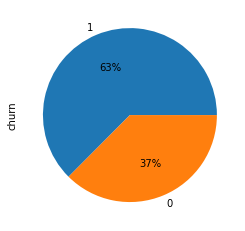

In [121]:
subscriber_base['churn'].value_counts().plot(kind='pie',autopct='%1.0f%%')

# 12)	What’s the average frequency (unique days) of platform visit for churners vs Non-churners? (20 points)

In [123]:
#creating a separate table for churners
conviva_churners = dataset[dataset['churn'] == 1]

In [124]:
conviva_churners.shape

(396156, 23)

In [125]:
#converting the UNIX timestamps to datetime
conviva_churners['starttime'] = pd.to_datetime(conviva_churners['starttime'],unit='s')

<ipython-input-125-e7cd72044046>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
conviva_churners

,viewerid,asset,deviceos,country,state,city,asn,isp,starttime,startuptime,playingtime,bufferingtime,interrupts,averagebitrate,startuperror,ipaddress,cdn,sessiontag_c3_player_name,sessiontag_c3_client_brand,sessiontag_connectiontype,sessiontag_c3_client_hwtype,sessiontag_accesstype,churn
0,0171fdb9-d8db-4e00-a9d8-c1619811ac66,[0-0-27132] Kedarnath,Android,india,madhya pradesh,bhopal,24560,"ASN: AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.,...",2019-06-03 10:25:55,5794,241545,7894,5,0,0,122.168.85.95,AKAMAI,Z5+FireTV+Jwplayer,Xiaomi,Data,TV,Premium,1
1,0171fdb9-d8db-4e00-a9d8-c1619811ac66,[0-0-35166] Simmba,Android,india,madhya pradesh,bhopal,24560,"ASN: AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.,...",2019-06-03 10:31:20,3804,495148,8820,3,0,0,122.168.85.95,AMAZON,Z5+FireTV+Jwplayer,Xiaomi,Data,TV,Premium,1
2,0171fdb9-d8db-4e00-a9d8-c1619811ac66,[0-0-35021] Nirahua Hindustani 3,Android,india,madhya pradesh,indore,24560,"ASN: AIRTELBROADBAND-AS-AP Bharti Airtel Ltd.,...",2019-06-02 04:12:11,15589,667004,0,0,0,0,122.170.203.36,AKAMAI,Z5+FireTV+Jwplayer,Xiaomi,Data,TV,Premium,1
3,02d7f343-f75d-4f10-a5c4-7f21ed6ff341,[0-1-215897] Skyfire - Episode 8 - The Monster,Android,india,uttar pradesh,ghaziabad,134375,ASN: FWSPL-AS-AP Fusionnet Web Services Privat...,2019-06-25 18:23:02,9716,28207,2055,1,0,0,103.219.230.183,AKAMAI,Z5+Android+Player_3.4.3,Oppo,WiFi,Mobile+Phone,Premium,1
4,02d7f343-f75d-4f10-a5c4-7f21ed6ff341,[0-0-6956] Great Grand Masti,Android,india,uttar pradesh,ghaziabad,134375,ASN: FWSPL-AS-AP Fusionnet Web Services Privat...,2019-06-29 18:49:09,4567,3509116,13811,2,0,0,103.219.229.92,AKAMAI,Z5+Android+Player_3.4.3,Oppo,WiFi,Mobile+Phone,Premium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403138,ffeccc29-f9bd-4c1d-b97f-e25c08a1f4f1,[0-1-213207] Auto Shankar - Episode 3 - The Ri...,Android,india,bihar,patna,55836,ASN: RELIANCEJIO-IN Reliance Jio Infocomm Limi...,2019-06-06 02:30:32,4417,17453,5248,2,0,0,47.29.28.47,AKAMAI,Z5+Android+Player_3.4.3,Oppo,Data,Mobile+Phone,Premium,1
403139,ffeccc29-f9bd-4c1d-b97f-e25c08a1f4f1,[0-0-8241] Desi Boyz,Android,india,uttar pradesh,lucknow,55836,ASN: RELIANCEJIO-IN Reliance Jio Infocomm Limi...,2019-06-03 14:15:48,5864,279244,33686,4,0,0,47.9.221.30,AKAMAI,Z5+Android+Player_3.4.3,Oppo,Data,Mobile+Phone,Premium,1
403140,ffeccc29-f9bd-4c1d-b97f-e25c08a1f4f1,[0-1-213126] Auto Shankar - Episode 7 - Clean ...,Android,india,bihar,patna,55836,ASN: RELIANCEJIO-IN Reliance Jio Infocomm Limi...,2019-06-06 02:11:22,2781,173273,37031,48,0,0,47.29.28.47,AKAMAI,Z5+Android+Player_3.4.3,Oppo,Data,Mobile+Phone,Premium,1
403141,ffeccc29-f9bd-4c1d-b97f-e25c08a1f4f1,[0-1-tvshow_1471565399-season_349665580-episod...,Android,india,bihar,patna,55836,ASN: RELIANCEJIO-IN Reliance Jio Infocomm Limi...,2019-06-06 01:30:14,2483,76166,1320,1,0,0,47.29.28.47,AKAMAI,Z5+Android+Player_3.4.3,Oppo,Data,Mobile+Phone,Premium,1


In [127]:
#creating a new column for storing the dates only
conviva_churners['starttimejustdate'] = conviva_churners['starttime'].dt.date

<ipython-input-127-6a2e1587c197>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
#calculating the unique number of dates (days) churners have visited the platform
churners_combined_days_visited = conviva_churners['starttimejustdate'].value_counts()

In [129]:
churners_total_days = churners_combined_days_visited.values.sum()

In [130]:
#umber of churners
conviva_churners['viewerid'].nunique()

62107

In [131]:
#dividing the number of days visited with number of churners get the average frequency
churners_freq_platform_visit = math.ceil(churners_total_days / conviva_churners['viewerid'].nunique())

In [133]:
print("The average frequency of platform visit for churners is",churners_freq_platform_visit,"days.")

The average frequency of platform visit for churners is 7 days.


In [136]:
#creating a separate table for non-churners
conviva_nonchurners = dataset[dataset['churn'] == 0]

In [137]:
conviva_nonchurners.shape

(634781, 23)

In [138]:
#converting the UNIX timestamps to datetime
conviva_nonchurners['starttime'] = pd.to_datetime(conviva_nonchurners['starttime'],unit='s')

<ipython-input-138-3d8cffb22cea>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
#creating a new column for storing the dates only
conviva_nonchurners['starttimejustdate'] = conviva_nonchurners['starttime'].dt.date

<ipython-input-139-15fa91cfe42b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
#calculating the unique number of dates (days) non-churners have visited the platform
nonchurners_combined_days_visited = conviva_nonchurners['starttimejustdate'].value_counts()

In [141]:
nonchurners_total_days = nonchurners_combined_days_visited.values.sum()

In [142]:
#number of non-churners
conviva_nonchurners['viewerid'].nunique()

37210

In [143]:
#dividing the number of days visited with number of non-churners to get the average frequency
nonchurners_freq_platform_visit = math.ceil(nonchurners_total_days / conviva_nonchurners['viewerid'].nunique())

In [144]:
print("The average frequency of platform visit for non-churners is",nonchurners_freq_platform_visit,"days.")

The average frequency of platform visit for non-churners is 18 days.


# 13)	Top 10 shows watched by churners & non churners? (20 points)

In [145]:
churners_shows = conviva_churners['asset'].value_counts()

In [146]:
#top 10 shows watched by churners
churners_shows.nlargest(10)

[0-0-39320] The Accidental Prime Minister              13937
[0-0-33204] Uri: The Surgical Strike                   12522
[0-0-35166] Simmba                                      9151
[0-0-27132] Kedarnath                                   8373
[0-1-226358] Kaafir - Episode 1 - The First Meeting     7566
[0-0-47046] Why Cheat India                             5281
[0-0-movie_1424717826] Veere Di Wedding                 4043
[0-1-215883] Skyfire - Skyfire - Episode 1 - Pralay     3792
[0-0-6728] Mulk                                         2747
[0-0-59341] Jersey                                      2650
Name: asset, dtype: int64

In [147]:
nonchurners_shows = conviva_nonchurners['asset'].value_counts()

In [148]:
#top 10 shows watched by churners
nonchurners_shows.nlargest(10)

[0-1-226358] Kaafir - Episode 1 - The First Meeting    11061
[0-0-39320] The Accidental Prime Minister               9281
[0-0-33204] Uri: The Surgical Strike                    9276
[0-0-35166] Simmba                                      6935
[0-0-27132] Kedarnath                                   6149
[0-0-59341] Jersey                                      5921
[0-0-47046] Why Cheat India                             4445
[0-9-zeemarathi] Zee Marathi                            4402
[0-1-215883] Skyfire - Skyfire - Episode 1 - Pralay     3720
[0-0-61493] ABCD                                        3248
Name: asset, dtype: int64

# 14)	What is the average engagement (watch time) of churn and non-churn users on weekdays and weekends? (20 points)

In [ ]:
#adding the calculated weekday column to the non-churners table
conviva_nonchurners['weekday'] = conviva_nonchurners['starttime'].dt.weekday

In [150]:
#selecting only those entries who have datetime entries of weekdays
conviva_nonchurners_weekdays = conviva_nonchurners[conviva_nonchurners['weekday'] < 5]

In [151]:
conviva_nonchurners_weekdays.shape

(436130, 25)

In [152]:
#calculating the total engagement time on weekdays
nonchurners_playingtime_weekday = conviva_nonchurners_weekdays['playingtime'].sum()

In [153]:
#calculating the average by dividing the total weekday engagement time with number of weekday entries
nonchurners_avg_playingtime_weekday = nonchurners_playingtime_weekday / len(conviva_nonchurners_weekdays)

In [154]:
print("The average engagement time of non-churners on weekdays is",math.ceil(nonchurners_avg_playingtime_weekday / 60000),"minutes.")

The average engagement time of non-churners on weekdays is 9 minutes.


In [155]:
#selecting only those entries who have datetime entries of weekdends
conviva_nonchurners_weekends = conviva_nonchurners[conviva_nonchurners['weekday'] > 4]

In [156]:
conviva_nonchurners_weekends.shape

(198651, 25)

In [157]:
#calculating the total engagement time on weekends
nonchurners_playingtime_weekends = conviva_nonchurners_weekends['playingtime'].sum()

In [158]:
#calculating the average by dividing the total weekend engagement time with number of weekend entries
nonchurners_avg_playingtime_weekends = nonchurners_playingtime_weekends / len(conviva_nonchurners_weekends)

In [159]:
print("The average engagement time of non-churners on weekends is",math.ceil(nonchurners_avg_playingtime_weekends / 60000),"minutes.")

The average engagement time of non-churners on weekends is 11 minutes.


In [160]:
#adding the calculated weekday column to the churners table
conviva_churners['weekday'] = conviva_churners['starttime'].dt.weekday

<ipython-input-160-a116db00f6db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
#selecting only those entries who have datetime entries of weekdays
conviva_churners_weekdays = conviva_churners[conviva_churners['weekday'] < 5]

In [162]:
conviva_churners_weekdays.shape

(255532, 25)

In [163]:
#calculating the total engagement time on weekdays
churners_playingtime_weekdays = conviva_churners_weekdays['playingtime'].sum()

In [164]:
#calculating the average by dividing the total weekday engagement time with number of weekday entries
churners_avg_playingtime_weekdays = churners_playingtime_weekdays / len(conviva_churners_weekdays)

In [165]:
print("The average engagement time of churners on weekdays is",math.ceil(churners_avg_playingtime_weekdays / 60000),"minutes.")

The average engagement time of churners on weekdays is 10 minutes.


In [166]:
#selecting only those entries who have datetime entries of weekends
conviva_churners_weekends = conviva_churners[conviva_churners['weekday'] > 4]

In [167]:
conviva_churners_weekends.shape

(140624, 25)

In [168]:
#calculating the total engagement time on weekends
churners_playingtime_weekends = conviva_churners_weekends['playingtime'].sum()

In [170]:
#calculating the average by dividing the total weekday engagement time with number of weekday entries
churners_avg_playingtime_weekends = churners_playingtime_weekends / len(conviva_churners_weekends)

In [171]:
print("The average engagement time of churners on weekends is",math.ceil(churners_avg_playingtime_weekends / 60000),"minutes.")

The average engagement time of churners on weekends is 12 minutes.


# 15)	Does Video Start time impact churn? (30 points)

In [173]:
import os
import pandas as pd
import numpy as np
import re
import math
from datetime import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import add_lowess
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [176]:
conviva_notna = dataset[dataset['asset'].notna()]

In [177]:
#performing Pearson's correlation test to find out whether video start time impacts churn
stat, p = pearsonr(conviva_notna['startuptime'], conviva_notna['churn'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Video start time probably does not impact churn')
else:
    print('Video start time probably impacts churn')

stat=0.020, p=0.000
Video start time probably impacts churn


In [181]:
plot_by_tenure = dataset.groupby('viewerid').sum().reset_index()
plot_data =[ 
    go.Scatter(
    x = plot_by_tenure['bufferingtime'],
    y = plot_by_tenure['churn'],
    mode = 'markers',
    name = 'Low',
    marker= dict(size = 5,
                 line = dict(width=0.8),
    color = 'green')
    )
]

plot_layout = go.Layout(
    xaxis = {'title': 'Tenure'},
    yaxis = {'title': 'Churn Rate'},
    title = 'Churn rate By Gender',
    plot_bgcolor = "rgb(243,243,243)",
    paper_bgcolor = "rgb(243,243,243)",
    )

fig = go.Figure(data=plot_data, layout = plot_layout)
po.iplot(fig)

# 16)	Does Rebuffering time impact churn? (30 points)

In [178]:
#performing Pearson's correlation test to find out whether buffering time impacts churn
stat, p = pearsonr(conviva_notna['bufferingtime'], conviva_notna['churn'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Rebuffering time probably does not impact churn')
else:
    print('Rebuffering time probably impacts churn')

stat=0.008, p=0.000
Rebuffering time probably impacts churn


In [2]:
list1 = [1,2,5,6,8,0,4,2,6,6,1,4,7,9]
#[0,2,6,8,4]

In [9]:
l=[]
for i in list1:
    if i%2==0:
        l.append(i)
print(l)
p =set(l)
print(p)

[2, 6, 8, 0, 4, 2, 6, 6, 4]
{0, 2, 4, 6, 8}


In [10]:
1
12
123
1234
12345

12345

In [21]:
#n=6
for i in range(1,6):
    for j in range(1,i):
        print(j,end="")
    print(i)
    


1
12
123
1234
12345
